# PWC Forage Internship - Predictive Health Care

#### Remark 

We have exactly the same results (as the corrections given in froage PWC) for the Lyrica, however for the Tramal there is a slightly difference. This is because, PWC used R and we used Python.

R and Python have some different default behaviors:

1) R and Python have different default settings for handling missing values. Their merge/join operations have slightly different default parameters. They may handle data type conversions differently


2) Data reading differences: Different default encodings (R and Python might interpret special characters differently). Different handling of white spaces and line endings. Different default settings for parsing dates and numbers


3) Implementation differences: Different algorithms for duplicate removal. Different approaches to string manipulation. Different ways of handling case sensitivity


4) Statistical computation differences: Slightly different rounding methods. Different default parameters in statistical functions. Different approaches to handling edge cases


5) Memory management: Different ways of storing and processing data in memory. Different approaches to data optimization

The key is to:

Document your methodology clearly. Be consistent within each language. Test your results thoroughly. Understand that small differences are acceptable as long as the overall conclusions remain valid. When exact matching is required, carefully align all parameters and methods between both languages

Beacause to slight variations in how R and Python handle data processing, but the overall conclusions about Tramal's adverse effects remain the same. So our results are perfeclty fine

In [74]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
# To display all rows
pd.set_option('display.max_rows', None)

# To display all columns
pd.set_option('display.max_columns', None)

In [111]:
drug_col = ['primaryid','drugname']
Q1_drug=r"C:\Users\lhoan\OneDrive\Bureau\Pwc - Forage\faers_ascii_2019Q1\ascii\DRUG19Q1.txt"
Q2_drug=r"C:\Users\lhoan\OneDrive\Bureau\Pwc - Forage\faers_ascii_2019Q2\ascii\DRUG19Q2.txt"
Q3_drug=r"C:\Users\lhoan\OneDrive\Bureau\Pwc - Forage\faers_ascii_2019Q3\ascii\DRUG19Q3.txt"
Q4_drug=r"C:\Users\lhoan\OneDrive\Bureau\Pwc - Forage\faers_ascii_2019Q4\ascii\DRUG19Q4.txt"

Q1_react = r"C:\Users\lhoan\OneDrive\Bureau\Pwc - Forage\faers_ascii_2019Q1\ascii\REAC19Q1.txt"
Q2_react = r"C:\Users\lhoan\OneDrive\Bureau\Pwc - Forage\faers_ascii_2019Q2\ascii\REAC19Q2.txt"
Q3_react = r"C:\Users\lhoan\OneDrive\Bureau\Pwc - Forage\faers_ascii_2019Q3\ascii\REAC19Q3.txt"
Q4_react = r"C:\Users\lhoan\OneDrive\Bureau\Pwc - Forage\faers_ascii_2019Q4\ascii\REAC19Q4.txt"

In [112]:
df_drug_Q1  = pd.read_csv(Q1_drug, delimiter='$', usecols=drug_col,dtype=str,encoding='latin1')
df_drug_Q2  = pd.read_csv(Q2_drug, delimiter='$', usecols=drug_col,dtype=str,encoding='latin1')
df_drug_Q3  = pd.read_csv(Q3_drug, delimiter='$', usecols=drug_col, dtype=str,encoding='latin1')
df_drug_Q4  = pd.read_csv(Q4_drug, delimiter='$', usecols=drug_col, dtype=str,encoding='latin1')

In [139]:
df_react_Q1  = pd.read_csv(Q1_react, delimiter='$',dtype=str,encoding='latin1')
df_react_Q2  = pd.read_csv(Q2_react, delimiter='$',dtype=str,encoding='latin1')
df_react_Q3  = pd.read_csv(Q3_react, delimiter='$',dtype=str,encoding='latin1')
df_react_Q4  = pd.read_csv(Q4_react, delimiter='$',dtype=str,encoding='latin1')

### Drug Dataset 

In [141]:
df_drug_Q1.head()

,primaryid,drugname
0,1000661812,LIPITOR
1,1000661812,BENTYL
2,1000661812,DICYCLOMINE
3,1000808590,SANDOSTATIN LAR DEPOT
4,1000808590,SANDOSTATIN LAR DEPOT


In [142]:
df_drug_Q2.head()

,primaryid,drugname
0,1000661813,LIPITOR
1,1000661813,BENTYL
2,1000661813,DICYCLOMINE
3,1000808410,"INFLIXIMAB, RECOMBINANT"
4,1000808410,METHOTREXATE.


In [143]:
df_drug_all = pd.concat([df_drug_Q1, df_drug_Q2, df_drug_Q3, df_drug_Q4], ignore_index=True)


In [144]:
df_drug_all[df_drug_all['primaryid']=='1000808590'] # remove duplicated 

,primaryid,drugname
3,1000808590,SANDOSTATIN LAR DEPOT
4,1000808590,SANDOSTATIN LAR DEPOT
5,1000808590,SANDOSTATIN LAR DEPOT
6,1000808590,SANDOSTATIN LAR DEPOT
7,1000808590,SANDOSTATIN LAR DEPOT
8,1000808590,SANDOSTATIN LAR DEPOT
9,1000808590,SANDOSTATIN LAR DEPOT
10,1000808590,SANDOSTATIN
11,1000808590,SANDOSTATIN
12,1000808590,DILTIAZEM HYDROCHLORIDE SANDOZ


In [145]:
# all the name in lower string
df_drug_all['drugname'] = df_drug_all['drugname'].str.lower()

In [146]:
#drug = sorted(df_drug_all["drugname"].dropna().astype(str).unique())  # Convert all to strings
#for i in drug:
 #   print(i)

In [147]:
drugUnique = df_drug_all.drop_duplicates(subset=["primaryid", "drugname"])

In [148]:
drugUnique[drugUnique['primaryid']=='1000808590']

,primaryid,drugname
3,1000808590,sandostatin lar depot
10,1000808590,sandostatin
12,1000808590,diltiazem hydrochloride sandoz
15,1000808590,cortisone
16,1000808590,pradaxa
18,1000808590,tiazac
20,1000808590,tambocor
21,1000808590,corticosteroid nos


In [149]:
drugUnique.shape

(6002613, 2)

Quick check that we reduce our data without having duplciate 

In [150]:
print(len(df_drug_all))
print(len(drugUnique))

7208616
6002613


In [151]:
drug_tramal = drugUnique[drugUnique['drugname'] == 'tramal']

In [152]:
drug_lyrica = drugUnique[drugUnique['drugname']=='lyrica']

#### Reaction dataset 

In [153]:
df_react_Q1.head()

,primaryid,caseid,pt,drug_rec_act
0,1000661812,10006618,Drug hypersensitivity,NaN
1,1000661812,10006618,Muscular weakness,NaN
2,1000661812,10006618,Rash,NaN
3,1000661812,10006618,Urticaria,NaN
4,1000808590,10008085,Abdominal adhesions,NaN


In [154]:
df_react_Q4.head()

,primaryid,caseid,pt,drug_rec_act
0,100046572,10004657,Type 2 diabetes mellitus,NaN
1,100046612,10004661,Glucose tolerance impaired,NaN
2,100046612,10004661,Type 2 diabetes mellitus,NaN
3,100046982,10004698,Type 2 diabetes mellitus,NaN
4,100047142,10004714,Type 2 diabetes mellitus,NaN


In [155]:
df_react_all = pd.concat([df_react_Q1, df_react_Q2, df_react_Q3, df_react_Q4], ignore_index=True)

In [156]:
df_react_all.head()

,primaryid,caseid,pt,drug_rec_act
0,1000661812,10006618,Drug hypersensitivity,NaN
1,1000661812,10006618,Muscular weakness,NaN
2,1000661812,10006618,Rash,NaN
3,1000661812,10006618,Urticaria,NaN
4,1000808590,10008085,Abdominal adhesions,NaN


In [157]:
df_react_all.shape

(5576726, 4)

In [158]:
df_react_all['pt'] = df_react_all['pt'].str.lower().str.strip()

In [159]:
#df_react_all[df_react_all['primaryid']=='1000808590'] #could remove duplicate of primaryid and pt 

We want to keep all the reactions and merge it with the drugs names. It's why we not drops any duplicates in the reaction dataset

### Merge tramal

In [185]:
# now put the two dataset together 
drug_react = df_react_all.merge(drug_tramal, on = ['primaryid'],how='left')

In [180]:
drug_react = drug_react.dropna(subset=['drugname'])

In [181]:
# Remove duplicate adverse event entries if needed
drug_react = drug_react.drop_duplicates(subset=['primaryid', 'pt'])

In [182]:
drug_react.head(10)

,primaryid,caseid,pt,drug_rec_act,drugname
8428,109822347,10982234,general physical health deterioration,NaN,tramal
9524,110887056,11088705,depressed mood,NaN,tramal
9525,110887056,11088705,disturbance in attention,NaN,tramal
9526,110887056,11088705,dyspnoea,NaN,tramal
9527,110887056,11088705,electrocardiogram qt prolonged,NaN,tramal
9528,110887056,11088705,fatigue,NaN,tramal
9529,110887056,11088705,gastritis,NaN,tramal
9530,110887056,11088705,general physical health deterioration,NaN,tramal
9531,110887056,11088705,insomnia,NaN,tramal
9532,110887056,11088705,supraventricular tachycardia,NaN,tramal


#### Graph Tramal

So, we can see that multiple TRAMAL exist, but I will keep with the basic TRAMAL.
Secondly, we can see that TRAMAL are written in upper cases and lower cases, so let's change that

### Tramal Drugs

In [183]:
#check 
df_tramal= drug_react[drug_react['drugname'] == 'tramal']
df_tramal['drugname'].unique()

array(['tramal'], dtype=object)

In [187]:
#df_tramal_react= df_tramal.groupby("pt").size()
df_tramal_react= df_tramal.groupby('pt').size()
sorted_tramal =df_tramal_react.sort_values(ascending=False)
sorted_tramal_10 = sorted_tramal[0:11]
sorted_tramal_10= sorted_tramal_10.sort_values()
sorted_tramal_10

pt
dementia                            29
abdominal distension                30
malignant neoplasm progression      30
ileus                               31
pneumonia                           32
white blood cell count increased    34
diarrhoea                           34
dyspnoea                            35
abdominal pain                      43
pyrexia                             47
nausea                              66
dtype: int64

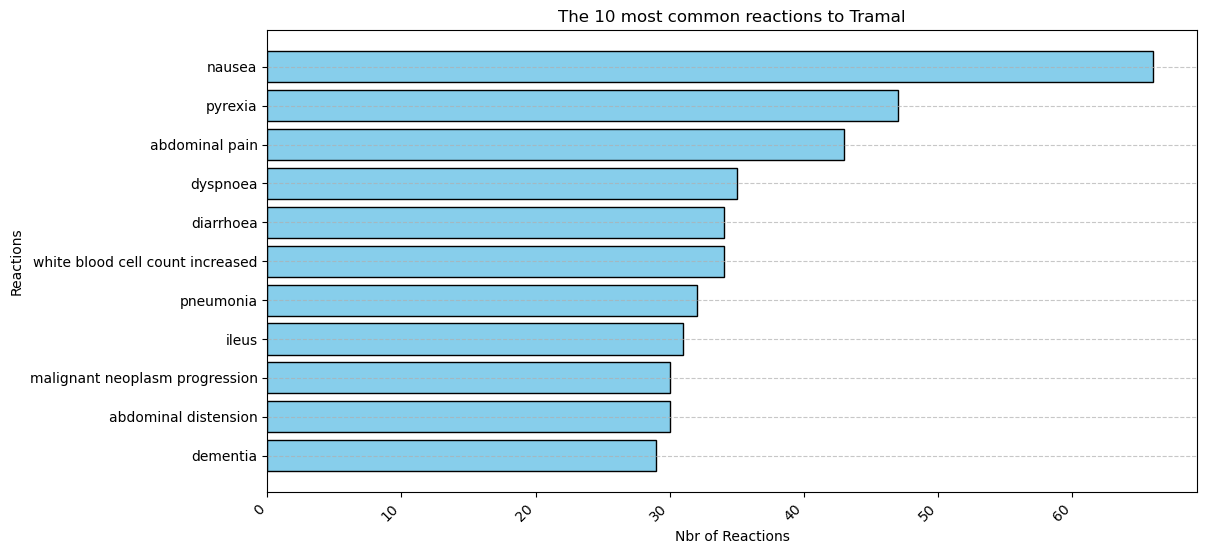

In [191]:
plt.figure(figsize=(12, 6))
plt.barh(sorted_tramal_10.index, sorted_tramal_10.values,color='skyblue', edgecolor='black')
plt.xlabel("Nbr of Reactions")
plt.ylabel("Reactions")
plt.title("The 10 most common reactions to Tramal")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Merge with Lyrica

In [192]:
drug_react_lyrica = df_react_all.merge(drug_lyrica, on = ['primaryid'],how='left')

In [212]:
df_lyrica = drug_react_lyrica[drug_react_lyrica['drugname']=='lyrica']

In [213]:
df_lyrica.head()

,primaryid,caseid,pt,drug_rec_act,drugname
148,100244892,10024489,arthritis,NaN,lyrica
149,100244892,10024489,balance disorder,NaN,lyrica
150,100244892,10024489,foot deformity,NaN,lyrica
151,100244892,10024489,intentional product misuse,NaN,lyrica
152,100244892,10024489,ligament sprain,NaN,lyrica


In [214]:
lyrica_count = df_lyrica.groupby('pt').size().sort_values(ascending=False)

In [215]:
lyrica_count[0:10]

pt
pain                   3753
drug ineffective       3073
malaise                2450
off label use          2310
pain in extremity      1591
fatigue                1498
insomnia               1458
feeling abnormal       1455
nausea                 1409
withdrawal syndrome    1377
dtype: int64

In [216]:
df_lyrica_10 = lyrica_count[0:10].sort_values()

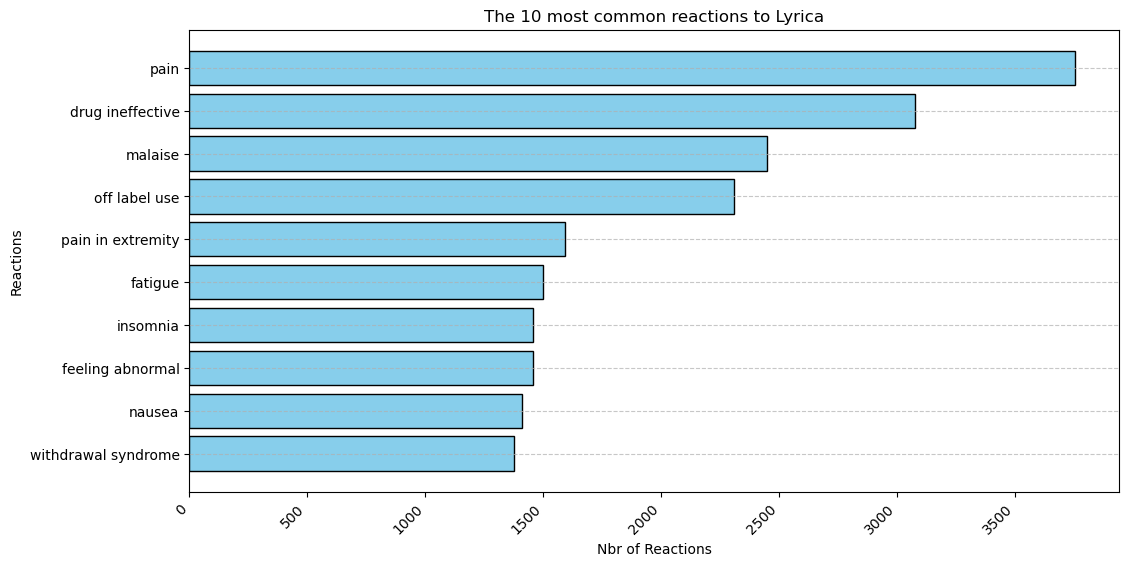

In [217]:
plt.figure(figsize=(12, 6))
plt.barh(df_lyrica_10.index, df_lyrica_10.values,color='skyblue', edgecolor='black')
plt.xlabel("Nbr of Reactions")
plt.ylabel("Reactions")
plt.title("The 10 most common reactions to Lyrica")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

#### Compare the % of reactions given the nbr of prescriptions

In [218]:
print(df_lyrica.shape)
print(df_tramal.shape)

(129283, 5)
(3650, 5)


For Lyrica

In [242]:
percentage_lyrica = df_lyrica_10/df_lyrica.shape[0]*100
percentage_lyrica

pt
withdrawal syndrome    1.065105
nausea                 1.089857
feeling abnormal       1.125438
insomnia               1.127758
fatigue                1.158698
pain in extremity      1.230634
off label use          1.786778
malaise                1.895067
drug ineffective       2.376956
pain                   2.902934
dtype: float64

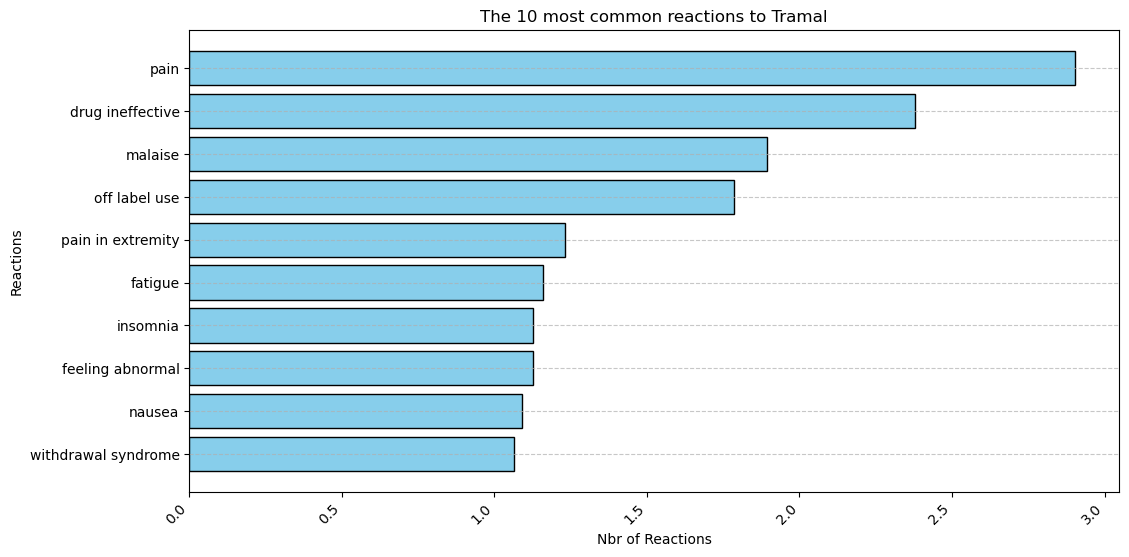

In [245]:
plt.figure(figsize=(12, 6))
plt.barh(percentage_lyrica.index, percentage_lyrica.values,color='skyblue', edgecolor='black')
plt.xlabel("Nbr of Reactions")
plt.ylabel("Reactions")
plt.title("The 10 most common reactions to Tramal")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

In [238]:
percenatge_tramal = sorted_tramal_10.sort_values(ascending=False)/df_tramal.shape[0]
percenatge_tramal= percenatge_tramal.sort_values()*100

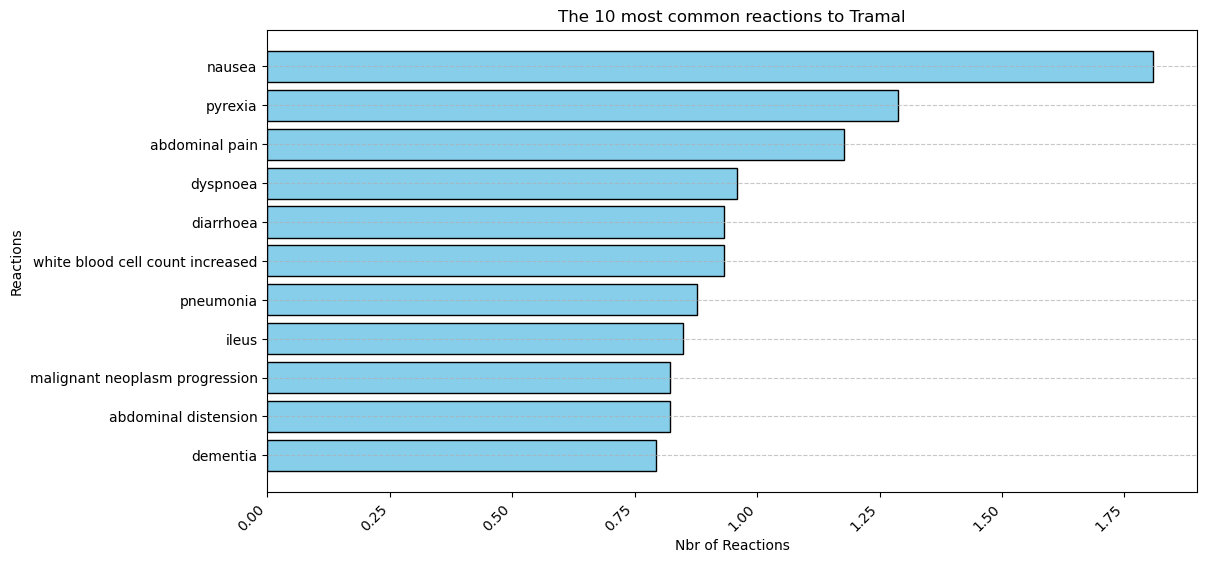

In [244]:
plt.figure(figsize=(12, 6))
plt.barh(percenatge_tramal.index,percenatge_tramal.values,color='skyblue', edgecolor='black')
plt.xlabel("Nbr of Reactions")
plt.ylabel("Reactions")
plt.title("The 10 most common reactions to Tramal")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)